Importar

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.constraints import maxnorm
from keras.utils import np_utils
from keras.models import Sequential
from tensorflow.keras import layers
#pd.options.mode.chained_assignment = None
from tensorflow.keras.layers import Dense, Activation,Dropout,Conv2D, MaxPooling2D,BatchNormalization, Flatten
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model, load_model, Sequential
from tensorflow.keras.optimizers import Adam, Adamax
img_height=255
img_width=255

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
test_datagen = ImageDataGenerator(rescale=1./255)
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        validation_split=0.2,
        horizontal_flip=True)
train_ds = train_datagen.flow_from_directory(
    directory='datos_nuevos/train',
    class_mode='categorical',
    batch_size=32,
    target_size=(img_height, img_width),
    subset='training')
validation_ds = train_datagen.flow_from_directory(
    directory='datos_nuevos/train',
    class_mode='categorical',
    batch_size=32,
    target_size=(img_height, img_width),
    subset='validation')
test_ds = test_datagen.flow_from_directory(
    directory='datos_nuevos/test',
    class_mode='categorical',
    batch_size=32,
    target_size=(img_height, img_width))


images, labels = next(train_ds)

print(images.shape)
print(labels.shape)

Found 12877 images belonging to 44 classes.
Found 3199 images belonging to 44 classes.
Found 2200 images belonging to 44 classes.
(32, 255, 255, 3)
(32, 44)


In [3]:
classes=['Bear', 'Camel', 'Cattle', 'Chicken',  'Deer', 'Duck', 'Eagle', 'Elephant', 'Fox', 'Frog', 'Giraffe', 'Goldfish', 'Hedgehog', 'Hippopotamus', 'Horse', 'Jaguar', 'Kangaroo', 'Koala', 'Lion', 'Lizard', 'Lynx', 'Magpie', 'Monkey', 'Ostrich', 'Otter', 'Owl', 'Panda', 'Parrot', 'Penguin', 'Polar bear', 'Rabbit', 'Raccoon', 'Red panda', 'Rhinoceros', 'Sheep', 'Snake', 'Sparrow', 'Squirrel', 'Swan', 'Tiger', 'Turkey', 'Turtle', 'Woodpecker', 'Zebra']
num_classes = len(classes)

from tensorflow.keras.applications import EfficientNetB0
efficient_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(255, 255, 3))

# Freeze four convolution blocks
for layer in efficient_model.layers[:233]:
    layer.trainable = False
# Make sure you have frozen the correct layers
for i, layer in enumerate(efficient_model.layers):
    print(i, layer.name, layer.trainable)

0 input_1 False
1 rescaling False
2 normalization False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_reshape F

In [4]:
x = efficient_model.output
x = Flatten()(x) # Flatten dimensions to for use in FC layers
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x) # Dropout layer to reduce overfitting
x = Dense(256, activation='relu')(x)
x = Dense(num_classes, activation='softmax')(x) # Softmax for multiclass
transfer_model = Model(inputs=efficient_model.input, outputs=x)

from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
lr_reduce = ReduceLROnPlateau(monitor='val_accuracy', factor=0.6, patience=8, verbose=1, mode='max', min_lr=5e-5)
checkpoint = ModelCheckpoint('efficientnet_animal_clasification.h5', monitor= 'val_accuracy', mode= 'max', save_best_only = True, verbose= 1)
from tensorflow.keras import layers, models, Model, optimizers
learning_rate= 5e-5
epochs=20
transfer_model.compile(loss="categorical_crossentropy", optimizer=optimizers.Adam(learning_rate=learning_rate), metrics=["accuracy"])
history = transfer_model.fit(train_ds, batch_size = 1, epochs=epochs, validation_data=validation_ds, callbacks=[lr_reduce,checkpoint])

Epoch 1/20
356/403 [=========================>....] - ETA: 54s - loss: 3.8097 - accuracy: 0.0502

C:\Users\andoi\anaconda3\lib\site-packages\PIL\Image.py:2918: DecompressionBombWarning: Image size (108731904 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


403/403 [==============================] - ETA: 0s - loss: 3.7922 - accuracy: 0.0511
Epoch 1: val_accuracy improved from -inf to 0.09097, saving model to efficientnet_animal_clasification.h5
403/403 [==============================] - 575s 1s/step - loss: 3.7922 - accuracy: 0.0511 - val_loss: 3.5724 - val_accuracy: 0.0910 - lr: 5.0000e-05
Epoch 2/20
403/403 [==============================] - ETA: 0s - loss: 3.6489 - accuracy: 0.0721
Epoch 2: val_accuracy did not improve from 0.09097
403/403 [==============================] - 524s 1s/step - loss: 3.6489 - accuracy: 0.0721 - val_loss: 3.5664 - val_accuracy: 0.0910 - lr: 5.0000e-05
Epoch 3/20
403/403 [==============================] - ETA: 0s - loss: 3.6212 - accuracy: 0.0867
Epoch 3: val_accuracy did not improve from 0.09097
403/403 [==============================] - 533s 1s/step - loss: 3.6212 - accuracy: 0.0867 - val_loss: 3.5700 - val_accuracy: 0.0910 - lr: 5.0000e-05
Epoch 4/20
403/403 [==============================] - ETA: 0s - loss

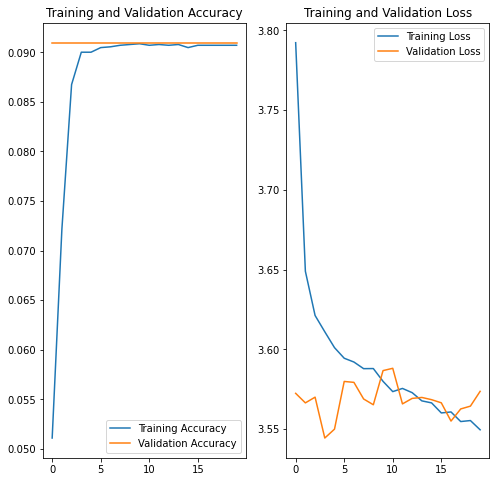

In [5]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

